In [10]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pylab as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
#import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pylab as plt
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_columns', None)





# convert csvs to dataframes
data = pd.read_csv('../data/training_set_prepped.csv')
test_set = pd.read_csv('../data/test_set_prepped.csv')

# Remove ID column
data.drop(['id'], axis=1, inplace=True)
test_set.drop(['id'], axis=1, inplace=True)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Split the data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1, max_iter=10000),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=6),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    'SVR': SVR(C=1.0, epsilon=0.1, gamma='scale'),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store the RMSE for each model
rmse_scores = {}

retthetsgrad= []

trained_models = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)

    trained_models[name] = model
    
    # Calculate RMSE and store it
    rmse_scores[name] = np.sqrt(mean_squared_error(y_val, y_pred))

    retthetsgrad.append((2**y_pred)/(2**y_val))

    # Print model name and "Done!"
    print(name, 'Done!')

# Display the RMSE scores
for name, rmse in rmse_scores.items():
    print(f"{name}: RMSE = {rmse:.3f}")


LinearRegression Done!
Ridge Done!


c:\Users\Mikkel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.33309e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Lasso Done!
DecisionTreeRegressor Done!
RandomForestRegressor Done!
GradientBoostingRegressor Done!
SVR Done!
KNeighborsRegressor Done!
LinearRegression: RMSE = 0.516
Ridge: RMSE = 0.516
Lasso: RMSE = 0.569
DecisionTreeRegressor: RMSE = 0.518
RandomForestRegressor: RMSE = 0.495
GradientBoostingRegressor: RMSE = 0.492
SVR: RMSE = 0.929
KNeighborsRegressor: RMSE = 0.580


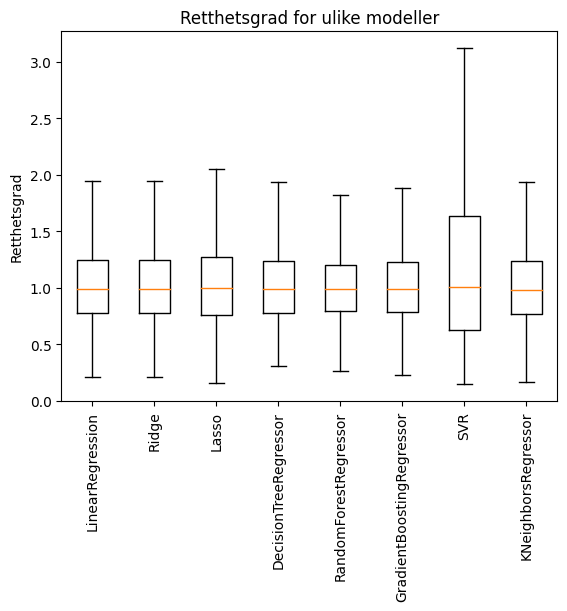

In [12]:
# Create boxplot of retthetsgrad, which is a list of lists

plt.boxplot(retthetsgrad, showfliers=False)
plt.xticks(range(1,9), models.keys(), rotation=90)
plt.ylabel('Retthetsgrad')
plt.title('Retthetsgrad for ulike modeller')
plt.show()


In [13]:
# Predict the prices of the test_set
temp = test_set.drop('price', axis=1)
test_set['price_predicted'] = trained_models['RandomForestRegressor'].predict(temp)

In [14]:
# print fraction of nan values in all columns of test_set
print(test_set.isna().sum()/len(test_set))

host_since                                      0.0
host_is_superhost                               0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
property_type                                   0.0
accommodates                                    0.0
bedrooms                                        0.0
beds                                            0.0
price                                           0.0
maximum_nights                                  0.0
number_of_reviews                               0.0
number_of_reviews_ltm                           0.0
number_of_reviews_l30d                          0.0
review_scores_rating                            0.0
instant_bookable                                0.0
calculated_host_listings_count                  0.0
calculated_host_listings_count_entire_homes     0.0
calculated_h

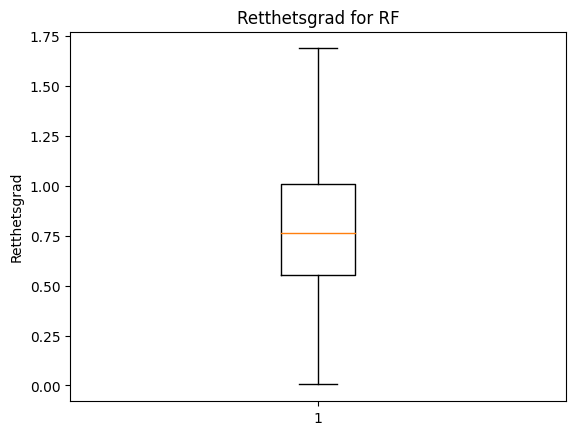

In [15]:
# create a boxplot of the predicted prices divided by the actual prices
plt.boxplot((2**test_set['price_predicted'])/(test_set['price']), showfliers=False)
plt.ylabel('Retthetsgrad')
plt.title('Retthetsgrad for RF')
plt.show()


In [16]:
# See feature importances of random forest regressor
importances = trained_models['RandomForestRegressor'].feature_importances_


#format importances nicely
feature_importances = pd.DataFrame(importances,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
property_type,0.556699
distance_to_closest_subway,0.073595
accommodates,0.068722
neighbourhood_group_cleansed_Manhattan,0.049414
host_since,0.031041
review_scores_rating,0.025944
reviews_per_month,0.023734
host_total_listings_count,0.020928
number_of_reviews,0.020294
maximum_nights,0.020146


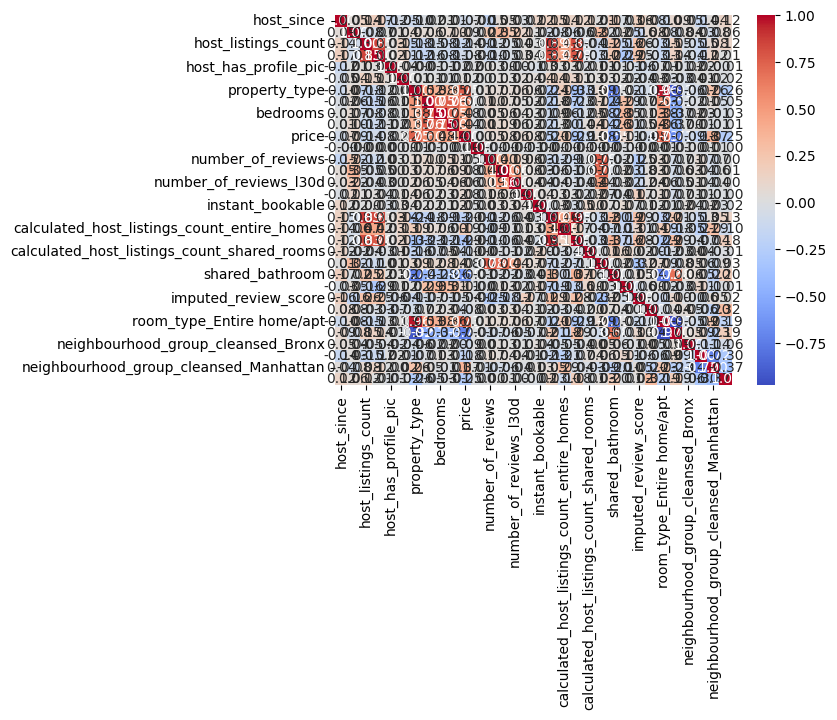

In [17]:
# Assuming 'df' is your DataFrame
corr_matrix = data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()